# Q2

## Define functions

This code defines two functions, "resize" and "crop", for image processing.

The "resize" function takes an input image and a desired size and returns a resized image of the desired size. It uses the OpenCV library to perform the resizing operation.

The "crop" function takes an input image, the size of the original image, and the size of the desired cropped images. It calculates the number of crops that can be made in each dimension and iterates over all possible crops. For each crop, it calculates the crop boundaries, crops the image, and adds it to a list of non-empty crops. It then returns the list of non-empty cropped images.

In [81]:
import cv2
import numpy as np

def resize(image, size):
  '''
    calculate the resized image
    input(s):
      image (ndarray): input image
      size (tuple): size of output image
    output(s):
      images (ndarray): the resized image
  '''

  resized_image = cv2.resize(image, size)
  return resized_image

def crop(image, MainSize, CropSize):
  '''
    calculate the cropped images
    input(s):
      image (ndarray): input image
      MainSize (tuple): size of input image
      CropSize (tuple): size of output image
    output(s):
      images (ndarray): the cropped images
  '''
  # note that your output should be 1100 number of images
  # so you should not save the images that all their pixels have a value of zero
  # hint : you can sum all the pixels for each cropped image with numpy
  
  images = []
  
  # calculate the number of crops in each dimension
  num_crops_x = MainSize[1] // CropSize[1]
  num_crops_y = MainSize[0] // CropSize[0]

  # iterate over all crops and append non-empty ones to images list
  for i in range(num_crops_y):
    for j in range(num_crops_x):
      # calculate the crop boundaries
      y_start = i * CropSize[0]
      y_end = (i + 1) * CropSize[0]
      x_start = j * CropSize[1]
      x_end = (j + 1) * CropSize[1]
      
      # crop the image
      crop_img = image[y_start:y_end, x_start:x_end]
      
      # add non-empty crops to images list
      if np.sum(crop_img) != 0:
        images.append(crop_img)
  
  return images


## Read the images

This code reads grayscale images from a directory named "Q2_images" and appends them to an array named "images". The path and filenames of the images are specified in the "images_path" list.

The code iterates over the "images_path" list, reads each image file using OpenCV, converts it to grayscale, and adds it to the "images" array.

The code then checks that the shape of each image is (544, 528) using an assertion statement. Finally, the code checks that the length of the "images" array is equal to 5 using another assertion statement.

In [82]:
# read the images with opencv from Q2_images directory and add them to images array
images_path = ["usps_1.jpg", "usps_2.jpg", "usps_3.jpg", "usps_4.jpg", "usps_5.jpg"]
images = []

for i in images_path:
    image = cv2.imread(f"Q2_images/{i}", cv2.IMREAD_GRAYSCALE)
    images.append(image)

    assert image.shape == (544, 528)

assert len(images) == 5

## Crop the images

This code iterates over all images in the "images" array and for each image, it calls the "crop" function to crop it into smaller sub-images of size 16x16 pixels. The cropped images are added to the "All_cropped_images" list. Finally, it has some assert statements to verify that the number of cropped images per image and the size of the cropped images are correct. Specifically, it checks that there are 1100 cropped images per image, and that the size of the first cropped image of the first image in the list is 16x16 pixels.

In [83]:
All_cropped_images = []
for img in images:
  MainSize = img.shape
  CropSize = (16,16)
  cropped_images = crop(img,MainSize,CropSize)
  All_cropped_images.append(cropped_images)

assert len(All_cropped_images) == 5
assert len(All_cropped_images[0]) == 1100
assert All_cropped_images[0][0].shape == (16,16)

## Resize and show images

in this section you should show 4 random images with size (50,50) for each number :
1.   select a random number with numpy library
2.   pick an image with that random number
3.   resize the image to (50,50) with resize function
4.   show the image with matplotlib library
5.   repeat the above steps 4 times for each number

**soultion:**

`num_images` sets the number of images to display per digit. `numbers_count` represents the total number of digits in the set of images. `main_size` is the size of each cropped image, and `size` is the size to which each cropped image is resized for display.

The code then iterates through each image in the set of images. For each image, it crops the image into smaller pieces using the crop function, and then selects a random set of `num_images` from those cropped images.

For each randomly selected cropped image, the code resizes the image to the specified size and adds it to a grid for display using the `matplotlib.pyplot` library. Finally, the code displays the grid of images using `plt.show()`.


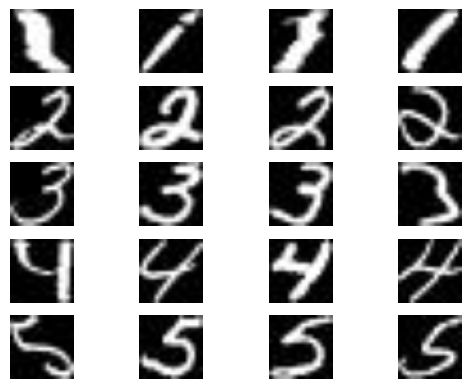

In [120]:
import random
import numpy as np
import matplotlib.pyplot as plt

# count of each number that should be shown
num_images = 4
# count of numbers
numbers_count = len(images)
main_size = (16,16)
size = (50, 50)

for num in range(numbers_count):
    image = images[num]
    croped_images = crop(image, image.shape, main_size)
    random_numbers = np.random.randint(len(croped_images), size=num_images)
    
    # Resize and show images
    for j in range(num_images):
        rnum = random_numbers[j]
        selected_image = croped_images[rnum]
        resized_image = resize(selected_image, size)

        index = num * num_images + j + 1
        plt.subplot(numbers_count, num_images, index)
        plt.imshow(resized_image, cmap='gray')
        plt.axis('off')
        
plt.show()
